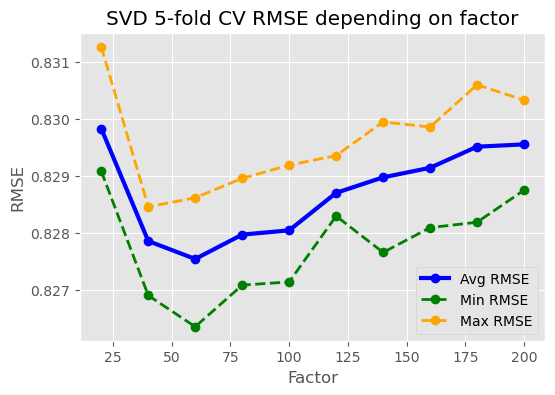

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()

df_ratings_XS = pd.read_csv('df_ratings_XS.csv', delimiter='|')
data = Dataset.load_from_df(df_ratings_XS[['Cust_Id', 'Movie_Id', 'Rating']], reader)

minrmse_ = []; maxrmse_ = []; avgrmse_ = []
f_ = []
for f in range(20, 201, 20):
    svd_ = SVD(biased=False, n_factors=f)
    res_ = cross_validate(svd_, data, measures=['RMSE'], cv=5, n_jobs=-1)
    f_.append(f)
    minrmse_.append(res_['test_rmse'].min())
    avgrmse_.append(res_['test_rmse'].mean())
    maxrmse_.append(res_['test_rmse'].max())

plt.style.use('ggplot')
plt.figure(figsize = (6,4))
plt.plot(f_, avgrmse_, marker = 'o', linewidth = 3, color='blue', label='Avg RMSE')
plt.plot(f_, minrmse_, marker = 'o', linewidth = 2, linestyle='--', color='green', label='Min RMSE')
plt.plot(f_, maxrmse_, marker = 'o', linewidth = 2, linestyle='--', color='orange', label='Max RMSE')
plt.xlabel('Factor')
plt.ylabel('RMSE')
plt.grid(visible=True)
plt.title("SVD 5-fold CV RMSE depending on factor")
plt.legend(loc='lower right')
plt.show()